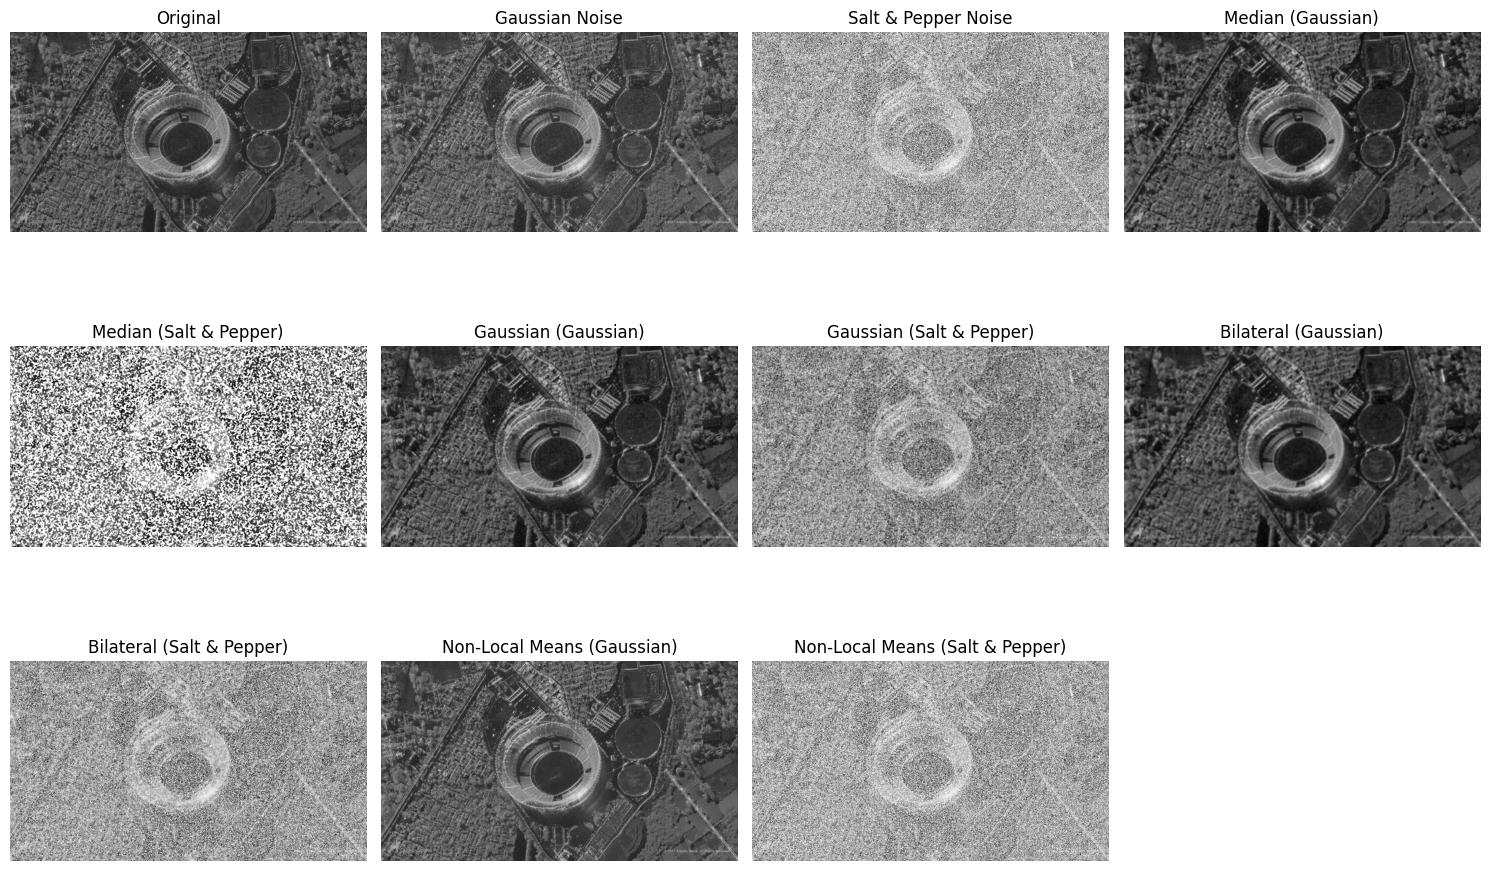

PSNR for Median Filter (Gaussian): 29.370124658800044
PSNR for Gaussian Filter (Gaussian): 28.91755713765699
PSNR for Bilateral Filter (Gaussian): 28.78886009735792
PSNR for Non-Local Means (Gaussian): 30.852975649686716
PSNR for Median Filter (Salt & Pepper): 28.07830486099167
PSNR for Gaussian Filter (Salt & Pepper): 27.787878780689116
PSNR for Bilateral Filter (Salt & Pepper): 28.27273159597322
PSNR for Non-Local Means (Salt & Pepper): 30.611597006855945


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

# Добавление шума Гаусса
gn = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gn = cv2.add(img, gn)

# Добавление шума "соль и перец"
spn = np.random.randint(0, 2, size=img.shape).astype(np.uint8) * 255
img_sp = cv2.add(img, spn)

# Применение медианного фильтра
mf_gn = cv2.medianBlur(img_gn, 5)
mf_sp = cv2.medianBlur(img_sp, 5)

# Применение фильтра Гаусса
gf_gn = cv2.GaussianBlur(img_gn, (5, 5), 0)
gf_sp = cv2.GaussianBlur(img_sp, (5, 5), 0)

# Применение билатериального фильтра
bf_gn = cv2.bilateralFilter(img_gn, 9, 75, 75)
bf_sp = cv2.bilateralFilter(img_sp, 9, 75, 75)

# Применение фильтра нелокальных средних
nlm_gn = cv2.fastNlMeansDenoising(img_gn, None, 10, 7, 21)
nlm_sp = cv2.fastNlMeansDenoising(img_sp, None, 10, 7, 21)

# Отображение результатов
titles = ['Original', 'Gaussian Noise', 'Salt & Pepper Noise',
          'Median (Gaussian)', 'Median (Salt & Pepper)',
          'Gaussian (Gaussian)', 'Gaussian (Salt & Pepper)',
          'Bilateral (Gaussian)', 'Bilateral (Salt & Pepper)',
          'Non-Local Means (Gaussian)', 'Non-Local Means (Salt & Pepper)']
images = [img, img_gn, img_sp, mf_gn, mf_sp, gf_gn, gf_sp, bf_gn, bf_sp, nlm_gn, nlm_sp]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

print("PSNR for Median Filter (Gaussian):", psnr(img, mf_gn))
print("PSNR for Gaussian Filter (Gaussian):", psnr(img, gf_gn))
print("PSNR for Bilateral Filter (Gaussian):", psnr(img, bf_gn))
print("PSNR for Non-Local Means (Gaussian):", psnr(img, nlm_gn))

print("PSNR for Median Filter (Salt & Pepper):", psnr(img, mf_sp))
print("PSNR for Gaussian Filter (Salt & Pepper):", psnr(img, gf_sp))
print("PSNR for Bilateral Filter (Salt & Pepper):", psnr(img, bf_sp))
print("PSNR for Non-Local Means (Salt & Pepper):", psnr(img, nlm_sp))
